In [5]:
# VGG16 with Random Forest

from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [2]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
import glob
from skimage import io

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# looking at few images


PNG
(100, 94)
RGB


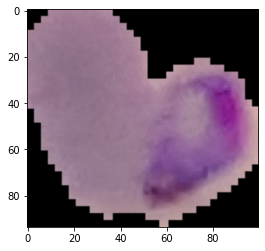

In [ ]:
img = Image.open('gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_6.png')
print(img.format)
print(img.size)
print(img.mode)
plt.imshow(img)

PNG
(121, 133)
RGB


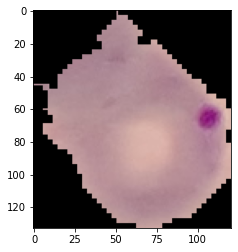

In [ ]:
img = Image.open('gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_8.png')
print(img.format)
print(img.size)
print(img.mode)
plt.imshow(img)

PNG
(133, 136)
RGB


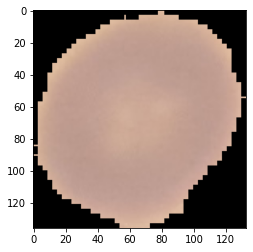

In [ ]:
img = Image.open('gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Uninfected/C2NThinF_IMG_20150604_114751_cell_107.png')
print(img.format)
print(img.size)
print(img.mode)
plt.imshow(img)

In [ ]:
#images are at different sizes

In [8]:

SIZE = 256
dataset = []   
label = []  



In [9]:
#parazitized
path = 'gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Parasitized/*.png'
for file in glob.glob(path): 
  img = cv2.imread(file)
  image = Image.fromarray(img, 'RGB')
  image = image.resize((SIZE, SIZE))
  dataset.append(np.array(image))
  label.append(0)

  
  

In [10]:
#uninfected
path = 'gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Uninfected/*.png'
for file in glob.glob(path): 
  img = cv2.imread(file)
  image = Image.fromarray(img, 'RGB')
  image = image.resize((SIZE, SIZE))
  dataset.append(np.array(image))
  label.append(1)
  

In [11]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [12]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [ ]:
#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)

In [14]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [16]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [17]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [19]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)


In [20]:

features = feature_extractor.reshape(feature_extractor.shape[0], -1)



In [21]:
X_for_RF = features #This is our X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [24]:
prediction_RF = RF_model.predict(X_test_features)



array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [26]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.926829268292683


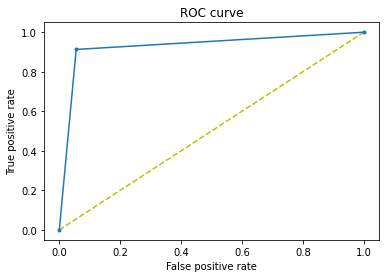

In [29]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, prediction_RF)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
#pip install  scikit-plot

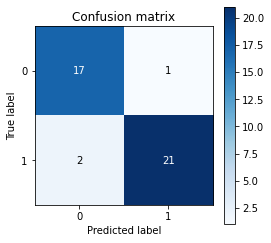

In [38]:
import scikitplot as skplt


skplt.metrics.plot_confusion_matrix(
        y_test,
        prediction_RF,
        figsize=(4, 4),title="Confusion matrix")


plt.show()

The prediction for this image is:  0
The actual label for this image is:  0


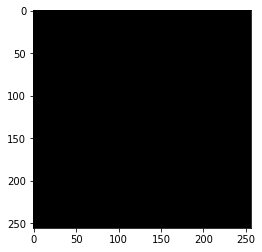

In [50]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 

print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])

In [ ]:
#looks good so far